In [2]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import os 

In [3]:
def short_term_energy(frame):
    return np.sum(frame**2)
def spectral_centroid(frame):
    return

In [4]:

def voice_segment(signal, frame_size, attribute_function):
    start = 0
    end = frame_size
    value = []
    while end < signal.shape[0]:
        temp_frame = np.float64(signal[start:end])
        value.append(eval(f"{attribute_function}(temp_frame)"))
        start += frame_size
        end += frame_size
    return value

In [5]:
def get_label(dir_path: str):
    label_names = [item for item in os.listdir(dir_path) if item.endswith(".lab")]
    res = {}
    for label_name in label_names:
        path = os.path.join(dir_path, label_name)
        with open(path, "r") as f:
            lines = f.read().splitlines()
            name = label_name[:label_name.rfind(".")]
            res[name] = {
                "mean": float(lines[-2].split()[-1]),
                "std": float(lines[-1].split()[-1]),
            }
            for line in lines[:-2]:
                line = line.split()
                start = float(line[0])
                end = float(line[1])
                label = line[2]
                if label not in res[name]:
                    res[name][label] = []
                res[name][label].append((start, end))
    return res

In [6]:
SAMPLE_DIR = r"/home/viethung/DSP/VowelRegconition/TinHieuKiemThu"
OTHER_SAMPLE_DIR = r"/home/viethung/DSP/VowelRegconition/TinHieuHuanLuyen"

In [7]:
labels = get_label(SAMPLE_DIR)
other_labels = get_label(OTHER_SAMPLE_DIR)

In [8]:
def get_value(labels,dir_path,attribute_functions):
    voice_values = {}
    for value in labels:
        voice_values[value] = []
        voice_frames = labels[value]['v']
        path = os.path.join(dir_path, value)
        sample_rate, signal = wavfile.read(f'{path}.wav')
        frame_size = int(sample_rate * 0.03)
        for frame in voice_frames:
            start = int(frame[0] * sample_rate)
            end = int(frame[1] * sample_rate)
            temp_signal = signal[start:end]
            voice_features = voice_segment(temp_signal, frame_size, attribute_functions)
            voice_features /= np.max(voice_features)
            voice_values[value].append(voice_features)
    return voice_values

In [35]:
def argmax(y):
    max = 0
    max_index = 0
    for i in range(len(y)):
        if y[i] > max:
            max_index = i
            max = y[i]
    return max_index

In [9]:
STE_voice_value = get_value(dir_path=SAMPLE_DIR,labels=labels, attribute_functions="short_term_energy")

/tmp/ipykernel_7170/3482111237.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, signal = wavfile.read(f'{path}.wav')


In [10]:
STE_other_voice_value = get_value(dir_path=OTHER_SAMPLE_DIR,labels=other_labels, attribute_functions="short_term_energy")

/tmp/ipykernel_7170/3482111237.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, signal = wavfile.read(f'{path}.wav')


In [11]:
import itertools
def value_for_plotting(voice_value, other_voice_value):
    y_voice = []
    for value in voice_value:
        #flatten array
        values = list(itertools.chain(*voice_value[value]))
        for amplitude in values:
            y_voice.append(amplitude)
    for value in other_voice_value:
        #flatten array
        values = list(itertools.chain(*other_voice_value[value]))
        for amplitude in values:
            y_voice.append(amplitude)
    return y_voice

182


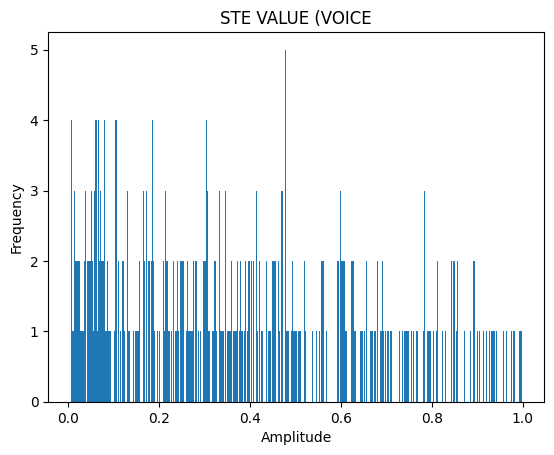

In [36]:
y_voice = value_for_plotting(STE_voice_value, STE_other_voice_value)
n, bins, patches = plt.hist(y_voice, bins=np.arange(min(y_voice), max(y_voice), step = 1 / len(y_voice)))
print(argmax(n))
plt.ylabel("Frequency")
plt.xlabel("Amplitude")
plt.title("STE VALUE (VOICE")
plt.show()

In [13]:
def get_unvoice_value(labels,dir_path,attribute_functions):
    unvoice_values = {}
    for value in labels:
        unvoice_values[value] = []
        unvoice_frames = labels[value]['uv']
        path = os.path.join(dir_path, value)
        sample_rate, signal = wavfile.read(f'{path}.wav')
        frame_size = int(sample_rate * 0.03)
        for frame in unvoice_frames:
            start = int(frame[0] * sample_rate)
            end = int(frame[1] * sample_rate)
            temp_signal = signal[start:end]
            voice_features = voice_segment(temp_signal, frame_size, attribute_functions)
            if len(voice_features) > 0:
                if np.max(voice_features) > 0:
                    voice_features /= np.max(voice_features)
            unvoice_values[value].append(voice_features)
    return unvoice_values

In [14]:
STE_unvoice_value = get_unvoice_value(labels, SAMPLE_DIR, "short_term_energy")
STE_other_unvoice_value = get_unvoice_value(other_labels, OTHER_SAMPLE_DIR, "short_term_energy")

/tmp/ipykernel_7170/2131510689.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, signal = wavfile.read(f'{path}.wav')


In [15]:
y_unvoice = value_for_plotting(STE_unvoice_value, STE_other_voice_value)

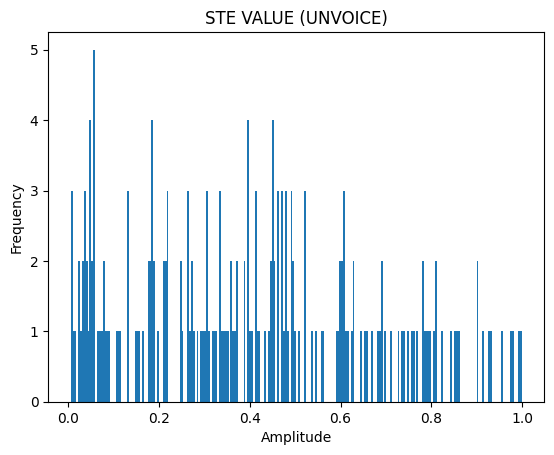

In [16]:
plt.hist(y_unvoice, bins=np.arange(min(y_unvoice), max(y_unvoice), step = 1 / len(y_unvoice)))
plt.ylabel("Frequency")
plt.xlabel("Amplitude")
plt.title("STE VALUE (UNVOICE)")
plt.show()